# 🚜 Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem defition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

# Standard Imports

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [120]:
df = pd.read_csv("data/TrainAndValid.csv", low_memory=False)

In [121]:
# Find the size of the training data
df.shape

(412698, 53)

In [122]:
# Check the statistical summary of the numeric data
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [123]:
# Check the number of columns
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [124]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00,5/19/2011 0:00,7/23/2009 0:00


In [125]:
# Check how many have NaN
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [126]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

# Parsing dates

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter.

In [127]:
df = pd.read_csv("data/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])

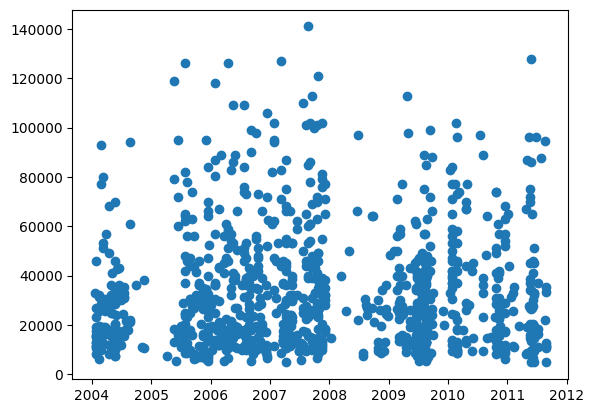

In [128]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [129]:
df.shape

(412698, 53)

In [130]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Make a copy of the original DataFrame

We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data.

In [131]:
df_temp = df.copy()

# Add datetime parameters for `saledate` column

In [132]:
df["saleYear"] = df.saledate.dt.year
df["saleMonth"] = df.saledate.dt.month
df["saleDay"] = df.saledate.dt.day
df["saleDayOfWeek"] = df.saledate.dt.dayofweek
df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
df["isMonthEnd"] = df.saledate.dt.is_month_end
df["isMonthStart"] = df.saledate.dt.is_month_start
df["isQuarterEnd"] = df.saledate.dt.is_quarter_end
df["isQuarterStart"] = df.saledate.dt.is_quarter_start
df["isYearEnd"] = df.saledate.dt.is_year_end
df["isYearStart"] = df.saledate.dt.is_year_start

In [133]:
df.shape

(412698, 64)

In [134]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
...,...,...,...,...,...
isMonthStart,False,False,False,False,False
isQuarterEnd,False,False,False,False,False
isQuarterStart,False,False,False,False,False
isYearEnd,False,False,False,False,False


In [135]:
df.drop("saledate",axis=1,inplace=True)

# 5. Modelling 

We've done enough EDA (we could always do more) but let's start to do some model-driven EDA.

In [136]:
# model = RandomForestRegressor(n_jobs=-1,
#                               random_state=42)

# model.fit(df.drop("SalePrice", axis=1), df["SalePrice"])

We see that there are many different types of dtypes like objects string etc are present, so we cant train like this!

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 63 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [138]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

df.isna().sum()

SalesID           0
SalePrice         0
MachineID         0
ModelID           0
datasource        0
                 ..
isMonthStart      0
isQuarterEnd      0
isQuarterStart    0
isYearEnd         0
isYearStart       0
Length: 63, dtype: int64

# Convert string to categories

One way we can turn all of our data into numbers is by converting them into pandas catgories.

We can check the different datatypes compatible with pandas here: https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality

In [139]:
# This is essentially asking: Is it a Numeric?
pd.api.types.is_numeric_dtype(df["UsageBand"])

False

In [140]:
# Find the columns which contain strings
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 63 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [142]:
df.isna().sum()

SalesID           0
SalePrice         0
MachineID         0
ModelID           0
datasource        0
                 ..
isMonthStart      0
isQuarterEnd      0
isQuarterStart    0
isYearEnd         0
isYearStart       0
Length: 63, dtype: int64

# Save Preprocessed Data
Export current dataframe 
So that later on we can start directly from here!

In [143]:
df.to_csv("data/train_temp_timeDate_cat.csv", index=False)

In [144]:
df = pd.read_csv("data/train_temp_timeDate_cat.csv", low_memory=False)

# Filling Missing Values 
#### FIll Numeric Values

In [145]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear
isMonthEnd
isMonthStart
isQuarterEnd
isQuarterStart
isYearEnd
isYearStart


In [146]:
# Check which ones actually have missing values from these numeric type: 

for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [147]:
# Fill these data with the median
# BUT also add information for each column that whether the information was missing or not
# Its just to say that originally the data was missing here

for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # ADD COLUMN
            df[label+"_is_missing"] = pd.isnull(content)
            # Fill the numeric columns with MEDIAN
            df[label] = content.fillna(content.median())

# Filling Non-Numeric Data

In [148]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [149]:
pd.Categorical(df["state"])

['Alabama', 'North Carolina', 'New York', 'Texas', 'New York', ..., 'Texas', 'Florida', 'Florida', 'Texas', 'Florida']
Length: 412698
Categories (53, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming']

In [150]:
pd.Categorical(df["state"]).codes

# SO each category has a unique code !

array([ 0, 32, 31, ...,  8, 43,  8], dtype=int8)

In [151]:
pd.Categorical(df["UsageBand"]).codes

# -1 indicates missing, if we dont want that we can do +1

array([ 1,  1,  0, ..., -1, -1, -1], dtype=int8)

SO we need to turn all the categories into some codes(numbers)

In [152]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # ADD THE BINARY COLUMN:
        df[label+"_is_missing"] = pd.isnull(content)
        # Fill in the missing categorical values with codes: 
        df[label] = pd.Categorical(content).codes+1

In [153]:
df.head(100).T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
SalesID,1139246,1139248,1139249,1139251,1139253,1139255,1139256,1139261,1139272,1139275,...,1139536,1139539,1139540,1139541,1139542,1139543,1139545,1139546,1139547,1139550
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0,26500.0,21000.0,27000.0,21500.0,65000.0,...,27000.0,21000.0,25000.0,12500.0,11500.0,25500.0,17500.0,64000.0,20500.0,27000.0
MachineID,999089,117657,434808,1026470,1057373,1001274,772701,902002,1036251,1016474,...,1029708,1054302,1014876,742947,1003012,1024992,273291,1031217,332277,62171
ModelID,3157,77,7009,332,17311,4605,1937,3539,36003,3883,...,3877,4794,4606,3423,1954,4794,7014,4789,1571,13776
datasource,121,121,121,121,121,121,121,121,121,121,...,121,121,121,121,121,121,121,121,121,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
Blade_Type_is_missing,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
Travel_Controls_is_missing,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
Differential_Type_is_missing,False,False,True,True,True,True,True,True,True,False,...,False,True,True,True,True,True,True,True,True,True


# Fitting the model

Split into train and Valid sets: Because we have imported TrainValid set itself

<br>

Train.csv is the training set, which contains data through the end of 2011.<br>
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout

<br>

So we'll seperate them out on the basis of years till 2011 is train set and 2012 is the valid set

In [154]:
train_set = df[df['saleYear'] <= 2011]
valid_set = df[df['saleYear'] == 2012]

len(train_set), len(valid_set)

(401125, 11573)

In [155]:
# Split into X and y: 
X_train, y_train = train_set.drop("SalePrice", axis=1), train_set.SalePrice
X_valid, y_valid = valid_set.drop("SalePrice", axis=1), valid_set.SalePrice

In [156]:
# %%time
# # Instantiate model
# model = RandomForestRegressor(n_jobs=-1,
#                               random_state=42)

# # Fit the model
# model.fit(X_train, y_train)

In [157]:
def rmsle(predicted, actual):
    """
    Calculate Root Mean Squared Logarithmic Error (RMSLE) between predicted and actual values.
    
    Parameters:
        predicted (array-like): Predicted values.
        actual (array-like): Actual values.
    
    Returns:
        float: RMSLE value.
    """
    predicted = np.log1p(predicted)
    actual = np.log1p(actual)
    squared_errors = (predicted - actual) ** 2
    mean_squared_log_error = np.mean(squared_errors)
    rmsle = np.sqrt(mean_squared_log_error)
    return rmsle

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

In [158]:
# %%time
# # Change max samples in RandomForestRegressor
# model = RandomForestRegressor(n_jobs=-1,
#                               max_samples=10000)

# # Cutting down the max number of samples each tree can see improves training time
# model.fit(X_train, y_train)

# show_scores(model) 

# # {'Training MAE': 5554.932337675286,
# #  'Valid MAE': 7156.405706385553,
# #  'Training RMSLE': 0.257042248794724,
# #  'Valid RMSLE': 0.29190177191266664,
# #  'Training R^2': 0.8605979885685595,
# #  'Valid R^2': 0.8326849277782598}

In [159]:
# %%time
# # Create the parameter grid based on the results of random search 
# forest = RandomForestRegressor(n_jobs=-1)

# param_grid = [
# {'n_estimators': [10, 25], 'max_features': [5, 10], 
#  'max_depth': [10, 50, None], "max_samples": [10000]}
# ]
# rs_model = RandomizedSearchCV(RandomForestRegressor(),
#                               param_distributions=param_grid,
#                               n_iter=20,
#                               cv=5,
#                               verbose=True)

# rs_model.fit(X_train, y_train)
# show_scores(rs_model)

# # {'Training MAE': 7003.379992969773,
# #  'Valid MAE': 8697.734164002419,
# #  'Training RMSLE': 0.31262385024577816,
# #  'Valid RMSLE': 0.3566794276527088,
# #  'Training R^2': 0.7918122394387178,
# #  'Valid R^2': 0.7762609505494079}

# # {'n_estimators': 25, 'max_samples': 10000, 'max_features': 10, 'max_depth': 50}

In [160]:
# ideal_model = rs_model.best_estimator_
# ideal_model.fit(X_train, y_train)
# show_scores(ideal_model)

# # {'Training MAE': 7038.273075674665,
# #  'Valid MAE': 8755.299054696277,
# #  'Training RMSLE': 0.3140420370346625,
# #  'Valid RMSLE': 0.35586171103270153,
# #  'Training R^2': 0.7888634791633351,
# #  'Valid R^2': 0.7683975790967323}

In [161]:
# ALREADY SAVED THIS MODEL NAMED fast_model.joblib

# Faster model
fast_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=3,
                                   max_features=0.5,
                                   n_jobs=-1)
# fast_model.fit(X_train, y_train)

In [162]:
# import joblib

# # Save the fast_model
# joblib.dump(fast_model, './models/fast_model.joblib')

In [163]:
# Load the saved model:
fast_model = joblib.load('./models/fast_model.joblib')

show_scores(fast_model)

{'Training MAE': 2544.136762781525,
 'Valid MAE': 5955.407887593964,
 'Training RMSLE': 0.12953417455831967,
 'Valid RMSLE': 0.2449983740063424,
 'Training R^2': 0.967116158291597,
 'Valid R^2': 0.8807201279930349}

# Make predictions on the Test Data

In [164]:
df_test = pd.read_csv("data/Test.csv",
                      parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [165]:
# fast_model.predict(df_test)

The test data isn't in the same format of our other data, so we have to fix it. Let's create a function to preprocess our data.

# Preprocessing Data

In [166]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [167]:
def preprocess_data(df):
    # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df["isMonthEnd"] = df.saledate.dt.is_month_end
    df["isMonthStart"] = df.saledate.dt.is_month_start
    df["isQuarterEnd"] = df.saledate.dt.is_quarter_end
    df["isQuarterStart"] = df.saledate.dt.is_quarter_start
    df["isYearEnd"] = df.saledate.dt.is_year_end
    df["isYearStart"] = df.saledate.dt.is_year_start
    
    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)
    
    # Find the columns which contain strings and convert them to categories
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()
    
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # ADD COLUMN
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill the numeric columns with MEDIAN
                df[label] = content.fillna(content.median())
                
        for label, content in df.items():
            if not pd.api.types.is_numeric_dtype(content):
                # ADD THE BINARY COLUMN:
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill in the missing categorical values with codes: 
                df[label] = pd.Categorical(content).codes+1       
    
    return df

In [168]:
df_test = preprocess_data(df_test)

C:\Users\prath\AppData\Local\Temp\ipykernel_1988\2851099686.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label+"_is_missing"] = pd.isnull(content)


In [169]:
df_test.shape

(12457, 107)

In [170]:
df.shape

(412698, 109)

In [171]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In this case, it's because the test dataset wasn't missing any auctioneerID fields.

To fix it, we'll add a column to the test dataset called auctioneerID_is_missing and fill it with False, since none of the auctioneerID fields are missing in the test dataset.

In [172]:
# Match test dataset columns to training dataset
df_test["auctioneerID_is_missing"] = False
df_test.head()

C:\Users\prath\AppData\Local\Temp\ipykernel_1988\2403804117.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test["auctioneerID_is_missing"] = False


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,MachineHoursCurrentMeter_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,False,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,False,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,True,True,True,True,True,False,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,True,True,True,True,True,False,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,False,False,False,True,True,False,False


In [173]:
df_test.shape

(12457, 108)

In [174]:
X_train.shape

(401125, 108)

In [175]:
df_test = df_test.reindex(columns=X_train.columns)

In [176]:
# Make predictions on the test dataset using the best model
test_preds = fast_model.predict(df_test)

X_TRAIN AND TEST SETS WERE NOT COMPLETELY MATCHING: SO HAD TO DO THESE STEPS TO FIGURE OUT THE PROBLEM:


In [177]:
# differing_columns = []
# for column_name in X_train.columns:
#     if column_name not in df_test.columns:
#         differing_columns.append(column_name)

# # Print the differing columns
# print("Differing columns:")
# for column in differing_columns:
#     print(column)
    
# if X_train.equals(df_test):
#     print("Dataframes are equal")
# else:
#     print("Dataframes are not equal")
    
# if set(X_train.columns) != set(df_test.columns):
#     print("Column names are not matching.")
# else:
#     print("Column names are matching.")

We've made some predictions but they're not in the same format Kaggle is asking for: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [178]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17421.503968
1,1227844,15826.044029
2,1227847,52108.015873
3,1227848,63281.461386
4,1227863,56538.050595
...,...,...
12452,6643171,40761.587302
12453,6643173,14399.517496
12454,6643184,14365.649621
12455,6643186,18016.215278


In [179]:
# Export prediction data
df_preds.to_csv("data/test_predictions.csv", index=False)

In [180]:
# mae = mean_absolute_error(df_test, df_preds)
# rmsle = np.sqrt(mean_squared_log_error(df_test, df_preds))
# r2 = r2_score(df_test, df_preds)

# # Print the evaluation metrics
# print("Test MAE:", mae)
# print("Test RMSLE:", rmsle)
# print("Test R^2:", r2)

In [181]:
# Find feature importance of our best model
fast_model.feature_importances_

array([3.42577687e-02, 2.13652405e-02, 4.32855866e-02, 1.94847168e-03,
       3.78980872e-03, 1.93700263e-01, 3.35983350e-03, 1.14498702e-03,
       4.49238873e-02, 4.35974401e-02, 6.40081198e-02, 4.27313177e-03,
       1.68561564e-02, 1.53474364e-01, 3.93178884e-02, 7.12643924e-03,
       3.04576431e-03, 3.61018779e-03, 3.50840177e-03, 7.48851118e-02,
       4.79525593e-04, 2.70478003e-04, 6.99875331e-04, 2.52690310e-04,
       1.46759307e-03, 2.32080707e-04, 4.57750380e-05, 8.90209976e-03,
       4.54041165e-03, 2.13655560e-04, 2.56891923e-03, 2.77894662e-03,
       3.33831851e-03, 2.45653020e-03, 2.19322771e-03, 1.15687758e-02,
       8.99059928e-04, 1.39592518e-02, 1.80322884e-03, 5.87643238e-05,
       1.14943707e-03, 9.21238630e-04, 2.05679164e-03, 6.77667015e-04,
       7.35084552e-04, 3.28260936e-04, 4.18505242e-04, 2.10446713e-03,
       1.55387086e-03, 3.27404128e-04, 3.39134877e-04, 7.40640273e-02,
       4.92937287e-03, 7.15198164e-03, 3.68104234e-03, 1.12085152e-02,
      

In [182]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

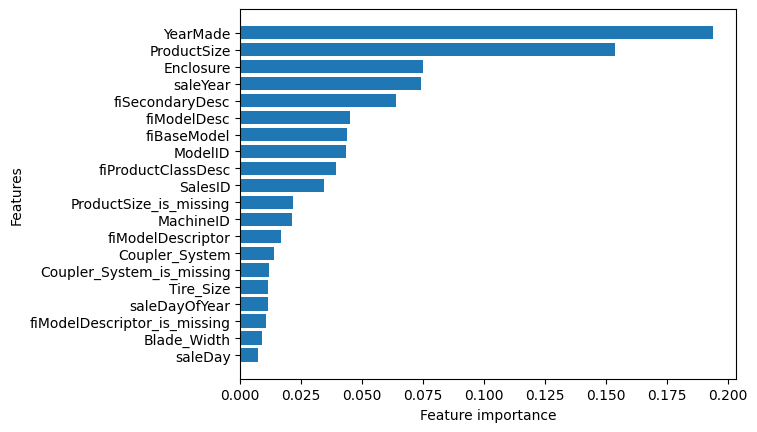

In [183]:
plot_features(X_train.columns, fast_model.feature_importances_)

# Trying out other Models

In [184]:
from catboost import CatBoostRegressor, cv, Pool

In [185]:
cb_model = CatBoostRegressor(random_seed=13, verbose=200)

In [186]:
# ALREADY SAVED THIS MODEL: named cb_model.catboost

# cb_model.fit(X_train, y_train)

In [188]:
# # Save the cb_model
# cb_model.save_model('./models/cb_model.catboost')

In [189]:
# Load the saved CatBoost model:
cb_model = CatBoostRegressor()
cb_model.load_model('./models/cb_model.catboost')

In [190]:
cb_preds = cb_model.predict(X_valid)

In [191]:
show_scores(cb_model)

# {'Training MAE': 4814.310697076826,
#  'Valid MAE': 6127.449972548095,
#  'Training RMSLE': 0.24108061433520955,
#  'Valid RMSLE': 0.2595286949506391,
#  'Training R^2': 0.899902279583848,
#  'Valid R^2': 0.8793279776721997}

C:\Users\prath\AppData\Local\Temp\ipykernel_1988\1773916387.py:13: RuntimeWarning: invalid value encountered in log1p
  actual = np.log1p(actual)


{'Training MAE': 4814.310697076826,
 'Valid MAE': 6127.449972548095,
 'Training RMSLE': 0.24108061433520955,
 'Valid RMSLE': 0.2595286949506391,
 'Training R^2': 0.899902279583848,
 'Valid R^2': 0.8793279776721997}

In [192]:
parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100]
                 }

In [197]:
%%time
grid = GridSearchCV(estimator=cb_model, param_grid = parameters, cv = 2, n_jobs=-1)
# grid.fit(X_train, y_train)

0:	learn: 21602.0982617	total: 367ms	remaining: 36.4s
99:	learn: 8418.7349437	total: 44.5s	remaining: 0us
CPU times: total: 3min 32s
Wall time: 12min 35s


GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x000002B08C4EC250>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [30, 50, 100],
                         'learning_rate': [0.01, 0.05, 0.1]})

In [198]:
# # Save the model
# import joblib
# joblib.dump(grid, './models/grid_searchCB1.joblib')

['./models/grid_searchCB1.joblib']

In [199]:
# load the model 
grid = joblib.load('./models/grid_searchCB1.joblib')

In [200]:
show_scores(grid)

# {'Training MAE': 5562.8215064765045,
#  'Valid MAE': 6955.103875219224,
#  'Training RMSLE': 0.2631249298728535,
#  'Valid RMSLE': 0.29197415213707095,
#  'Training R^2': 0.8668800204954553,
#  'Valid R^2': 0.8455355415452198}

{'Training MAE': 5581.70074757738,
 'Valid MAE': 6949.867292407332,
 'Training RMSLE': 0.26384293812676785,
 'Valid RMSLE': 0.29372590376788904,
 'Training R^2': 0.8664491250312623,
 'Valid R^2': 0.846824241625184}

In [201]:
# from scipy.stats import uniform

# param_grid = {
#     'iterations': [100, 200, 300],  # Number of boosting iterations
#     'learning_rate': [0.01, 0.05, 0.1],
#     'depth': [4, 6, 8],  # Depth of the trees
#     'l2_leaf_reg': uniform(0, 10)  # L2 regularization coefficient
# }

In [202]:
# random_search = RandomizedSearchCV(
#     cb_model, param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=5, verbose=1, random_state=42
# )

# # Fit the RandomizedSearchCV object to the data
# random_search.fit(X_train, y_train)

In [203]:
# show_scores(random_search)

# # {'Training MAE': 5118.822051127646,
# #  'Valid MAE': 6512.669779423266,
# #  'Training RMSLE': 0.25035101185567815,
# #  'Valid RMSLE': 0.27775222482407247,
# #  'Training R^2': -60160441.58633246,
# #  'Valid R^2': -93006804.7969426}

In [204]:
from xgboost import XGBRegressor

xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
             grow_policy=None, importance_type='gain',
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
             max_depth=3, max_leaves=None, min_child_weight=1, missing=None,
             monotone_constraints=None, n_estimators=100, n_jobs=1,
             nthread=None, num_parallel_tree=None, objective='reg:linear', ...)

In [205]:
# xbgr = xgbr.fit(X_train, y_train)

In [206]:
# Save the model:
joblib.dump(xbgr, './models/xgb_model.joblib')

['./models/xgb_model.joblib']

In [207]:
# load the model:
xbgr = joblib.load('./models/xgb_model.joblib')

In [208]:
show_scores(xbgr)

C:\Users\prath\AppData\Local\Temp\ipykernel_1988\1773916387.py:13: RuntimeWarning: invalid value encountered in log1p
  actual = np.log1p(actual)


{'Training MAE': 4944.523848838956,
 'Valid MAE': 6486.55925646401,
 'Training RMSLE': 0.24803777599868362,
 'Valid RMSLE': 0.2822765175537978,
 'Training R^2': 0.8968387595235685,
 'Valid R^2': 0.8664763225259078}